In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

input layer had mean 0.000132 and std 1.000545
hidden layer 0 had mean 0.399360 and std 0.585701
hidden layer 1 had mean 0.278334 and std 0.409344
hidden layer 2 had mean 0.211773 and std 0.302261
hidden layer 3 had mean 0.146289 and std 0.217899
hidden layer 4 had mean 0.109447 and std 0.159110
hidden layer 5 had mean 0.079681 and std 0.114566
hidden layer 6 had mean 0.056384 and std 0.087970
hidden layer 7 had mean 0.043535 and std 0.062867
hidden layer 8 had mean 0.026914 and std 0.043162
hidden layer 9 had mean 0.020534 and std 0.029673


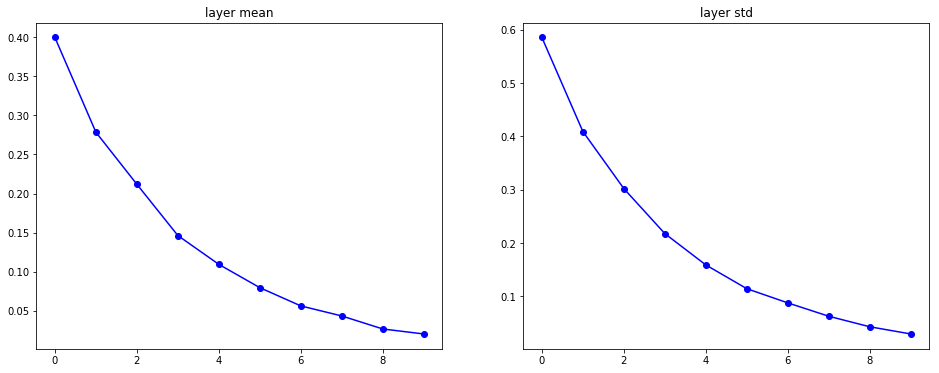

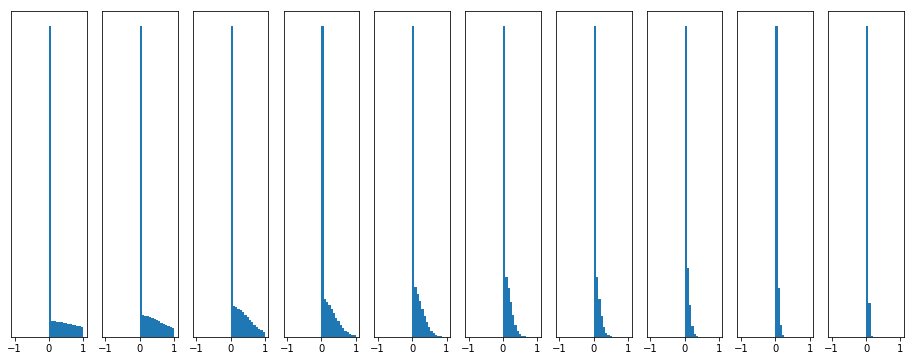

In [7]:
# assume random data with N=1000 and 500 features
N = 1000
n_feat = 500
n_layers = 10

D = np.random.randn(N, n_feat)
hidden_layer_sizes = [500] * n_layers
nonlinearities = ['relu'] * n_layers

xavier = True

act = {'relu': lambda x: np.maximum(0,x), 'tanh': lambda x: np.tanh(x)}
Hs = {}
for i in range(n_layers):
    X = D if i==0 else Hs[i-1]
    dims_in = X.shape[1]
    dims_out = hidden_layer_sizes[i]
    if xavier:
        W = np.random.randn(dims_in, dims_out) / np.sqrt(dims_in)
    else:
        W = np.random.randn(dims_in, dims_out) * 1.0
    
    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H
    
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, _ in Hs.items():
    print('hidden layer %d had mean %f and std %f' % (i, layer_means[i], layer_stds[i]))
    
size=(16,6)
plt.figure(figsize=size)
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'ob-')
plt.title('layer std')

plt.figure(figsize=size)
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1,1))
    plt.yticks([])